Testing class pull_back: 100%|██████████| 459/459 [00:09<00:00, 49.45dataframe/s]


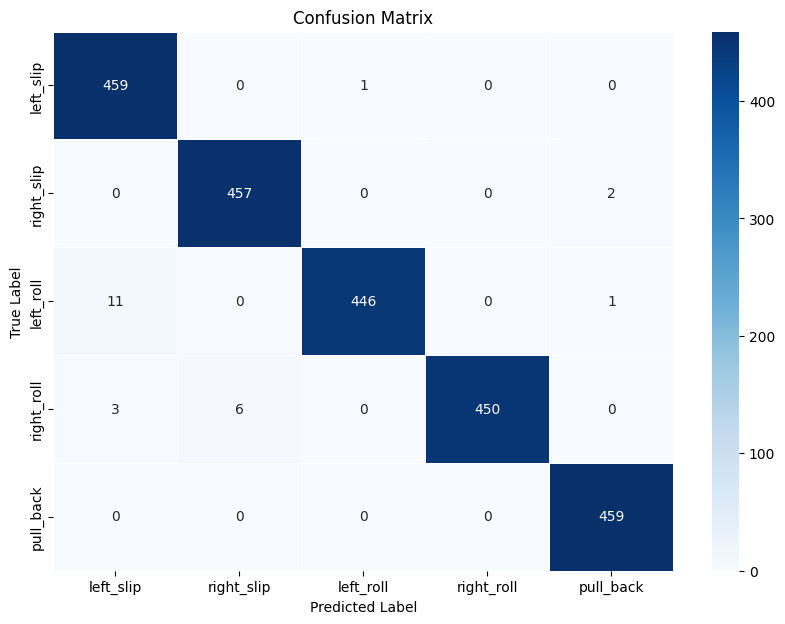

              precision    recall  f1-score   support

   left_slip       0.97      1.00      0.98       460
  right_slip       0.99      1.00      0.99       459
   left_roll       1.00      0.97      0.99       458
  right_roll       1.00      0.98      0.99       459
   pull_back       0.99      1.00      1.00       459

    accuracy                           0.99      2295
   macro avg       0.99      0.99      0.99      2295
weighted avg       0.99      0.99      0.99      2295


In [3]:
from BoxingRecognition.util import EvaluationUtility, DataUtility, DynamicTimeWarpingUtility
import numpy as np

# Import the templates
left_slip_template = np.loadtxt('../Data/dtw/left_slip_concatenated_template.csv', delimiter=',')
right_slip_template = np.loadtxt('../Data/dtw/right_slip_concatenated_template.csv', delimiter=',')
left_roll_template = np.loadtxt('../Data/dtw/left_roll_concatenated_template.csv', delimiter=',')
right_roll_template = np.loadtxt('../Data/dtw/right_roll_concatenated_template.csv', delimiter=',')
pull_back_template = np.loadtxt('../Data/dtw/pull_back_concatenated_template.csv', delimiter=',')
templates = {
    'left_slip': left_slip_template,
    'right_slip': right_slip_template,
    'left_roll': left_roll_template,
    'right_roll': right_roll_template,
    'pull_back': pull_back_template
}

# Load the gesture dataframes
idle_dataframes, left_slip_dataframes, right_slip_dataframes, left_roll_dataframes, right_roll_dataframes, pull_back_dataframes = DataUtility.collect_label_dataframes(
    DataUtility.get_aggregate_df(drop_unlabeled_data=False, sessions=[1, 2, 3, 4, 5, 6], shuffle_sequences=False,
                                 augment_data=False))
gestures = {
    'left_slip': left_slip_dataframes,
    'right_slip': right_slip_dataframes,
    'left_roll': left_roll_dataframes,
    'right_roll': right_roll_dataframes,
    'pull_back': pull_back_dataframes
}

# Test
results = DynamicTimeWarpingUtility.test_classification(dataframes_to_test=gestures,templates=templates)
EvaluationUtility.evaluate_dtw(results, gestures.keys())

Testing class pull_back: 100%|██████████| 459/459 [00:10<00:00, 41.82dataframe/s]


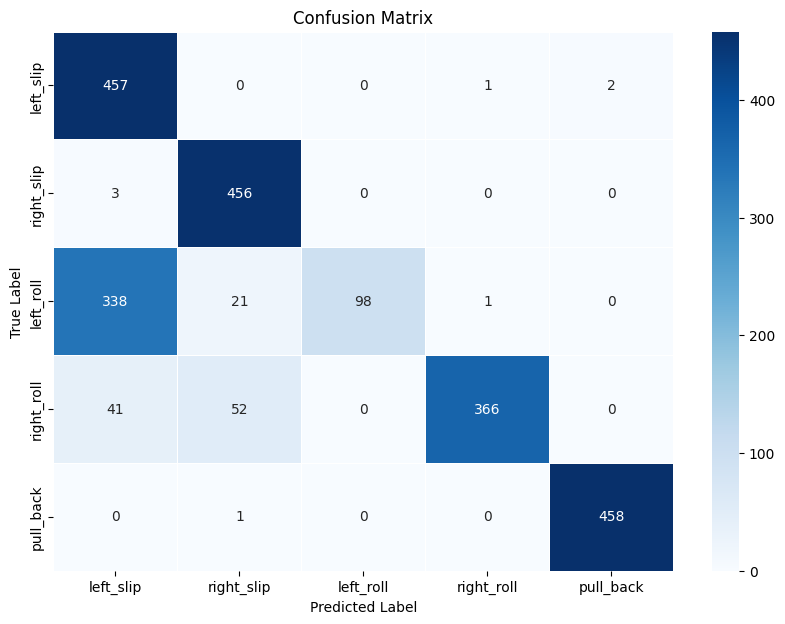

              precision    recall  f1-score   support

   left_slip       0.54      0.99      0.70       460
  right_slip       0.86      0.99      0.92       459
   left_roll       1.00      0.21      0.35       458
  right_roll       0.99      0.80      0.89       459
   pull_back       1.00      1.00      1.00       459

    accuracy                           0.80      2295
   macro avg       0.88      0.80      0.77      2295
weighted avg       0.88      0.80      0.77      2295


In [4]:
# Now, try it with the random sample templates
left_slip_template = np.loadtxt('../Data/dtw/random_left_slip_template.csv', delimiter=',')
right_slip_template = np.loadtxt('../Data/dtw/random_right_slip_template.csv', delimiter=',')
left_roll_template = np.loadtxt('../Data/dtw/random_left_roll_template.csv', delimiter=',')
right_roll_template = np.loadtxt('../Data/dtw/random_right_roll_template.csv', delimiter=',')
pull_back_template = np.loadtxt('../Data/dtw/random_pull_back_template.csv', delimiter=',')

templates = {
    'left_slip': left_slip_template,
    'right_slip': right_slip_template,
    'left_roll': left_roll_template,
    'right_roll': right_roll_template,
    'pull_back': pull_back_template
}

# Test
results = DynamicTimeWarpingUtility.test_classification(dataframes_to_test=gestures,templates=templates)
EvaluationUtility.evaluate_dtw(results, gestures.keys())